<a href="https://colab.research.google.com/github/marisbotero/Master_IA/blob/main/Encuesta_sesgo_de_genero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/Encuesta de genero-comunidad de Data Science (Respuestas).xlsx')

In [4]:
df.head(1)

id      País    Ciudad       Edad               Profesión  \
0   1  Colombia  Envigado  mas de 35  Ingeniera de sistemas    

  ¿Trabajas en el ámbito de la tecnología o la inteligencia artificial?  \
0                                                 No                      

  ¿Cuál es tu campo de trabajo o área de especialización?  \
0                              Business Intelligence        

  ¿Has oído hablar del sesgo de género en los sistemas de inteligencia artificial?  \
0                                                 si                                 

  ¿Crees que los sistemas de inteligencia artificial pueden estar sesgados hacia algún género?  \
0                                                 si                                             

  ¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?  \
0         Se da especialmente en la parte comercial                                                              

  ¿Consideras que la presencia de sesgo de género en los sistemas de inteligencia artificial es un problema grave?  \
0                                                 si                                                                 

  ¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?  \
0                               Las fuentes de datos                                                                 

  ¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?  \
0                 Haciendo la medición la prediccion                                                  

  ¿Consideras que los desarrolladores de los sistemas de inteligencia artificial deberían ser responsables de prevenir el sesgo de género en sus creaciones?  \
0                                                 si                                                                                                           

  ¿Has experimentado alguna vez un trato injusto o discriminatorio en relación con un sistema de inteligencia artificial debido a tu género?  \
0                                                 No                                                                                           

  ¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?  \
0                                                NaN                                                              

  ¿Crees que se deberían establecer regulaciones y políticas públicas para prevenir el sesgo de género en los sistemas de inteligencia artificial?  \
0                                                NaN                                                                                                 

  ¿Crees que la diversidad de género en los equipos de desarrollo de sistemas de inteligencia artificial puede ayudar a prevenir el sesgo de género en los productos?  
0                                                 si

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Conteo de países
conteo_paises = df['País'].value_counts()
print(conteo_paises)

# Conteo de ciudades
conteo_ciudades = df['Ciudad'].value_counts()
print(conteo_ciudades)

# Conteo de edades
conteo_edades = df['Edad'].value_counts()
print(conteo_edades)

# Conteo de profesiones
conteo_profesiones = df['Profesión'].value_counts()
print(conteo_profesiones)


Colombia           31
Venezuela           2
México              2
Colombia            1
Bolivia             1
Estados Unidos      1
Australia           1
Argentina           1
Name: País, dtype: int64
Medellín        16
Medellin         3
Envigado         2
Medellín         2
Bogotá           2
Adelaide         1
Armenia          1
Rionegro         1
Itagui           1
Quito            1
Buenos Aires     1
SOACHA           1
Cdmx             1
Acacías          1
MTY              1
Los Angeles      1
Maracaibo        1
Jamundí          1
Cochabamba       1
Rionegro         1
Name: Ciudad, dtype: int64
mas de 35    12
30            4
27            4
26            2
28            2
33            2
24            2
34            2
23            2
31            2
25            2
32            1
21            1
22            1
19            1
Name: Edad, dtype: int64
Ingeniera de sistemas                                  19
cientifica de datos                                     5
Economísta 

In [7]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Concatenar las respuestas sobre el sesgo de género en un solo texto
respuestas_sesgo_genero = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Tokenizar el texto en palabras
tokens = word_tokenize(respuestas_sesgo_genero)

# Calcular la frecuencia de cada palabra
frecuencia_palabras = FreqDist(tokens)

# Mostrar las palabras más frecuentes
print(frecuencia_palabras.most_common(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('de', 77), (',', 44), ('que', 43), ('la', 39), ('los', 37), ('en', 34), ('y', 21), ('género', 21), ('.', 19), ('sesgos', 16)]


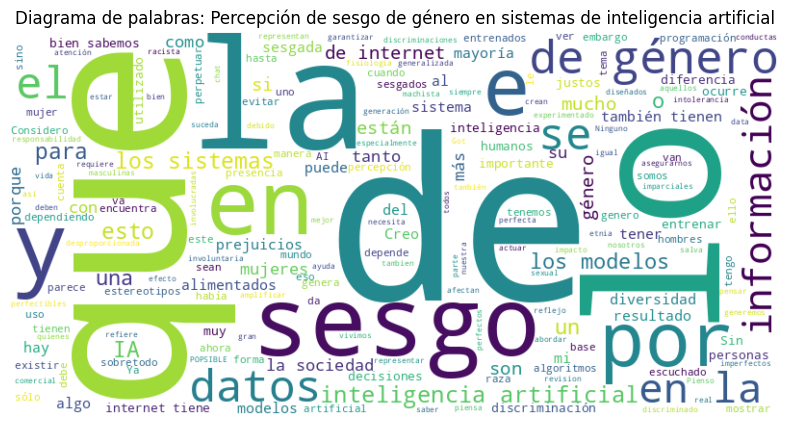

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar las respuestas en un solo texto
respuestas = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(respuestas)

# Mostrar el diagrama de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Diagrama de palabras: Percepción de sesgo de género en sistemas de inteligencia artificial')
plt.show()


In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for topic in topicos:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(0, '0.029*"datos" + 0.016*"entrenar" + 0.016*"diversidad" + 0.016*"género" + 0.016*"requiere"')
(1, '0.093*"," + 0.030*"información" + 0.030*"género" + 0.027*"modelos" + 0.024*"sesgos"')
(2, '0.045*"," + 0.031*"." + 0.030*"artificial" + 0.023*"sesgo" + 0.023*"sesgos"')
(3, '0.052*"género" + 0.047*"," + 0.037*"." + 0.032*"inteligencia" + 0.032*"artificial"')
(4, '0.023*"sesgos" + 0.023*"datos" + 0.016*"programación" + 0.016*"forma" + 0.016*"modelos"')


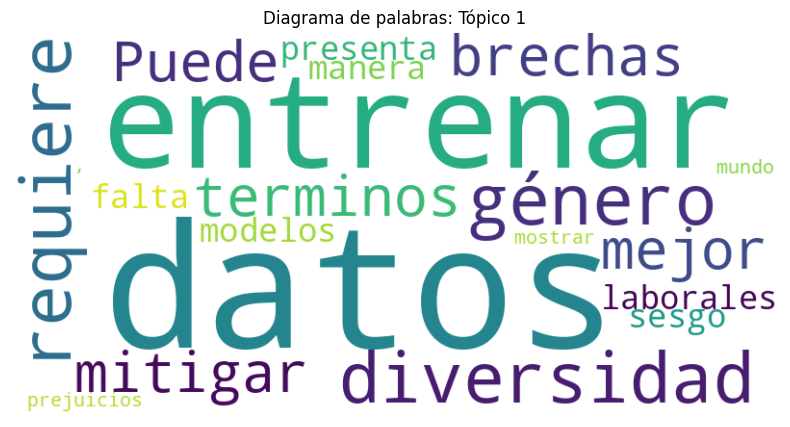

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener las palabras clave de los tópicos
palabras_clave = [modelo_lda.show_topic(i, topn=20) for i in range(num_topics)]

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').fit_words(dict(palabras_clave[0]))

# Mostrar el diagrama de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Diagrama de palabras: Tópico 1')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tópico 0: 0.083*"," + 0.040*"modelos" + 0.040*"información" + 0.031*"." + 0.027*"sesgos"


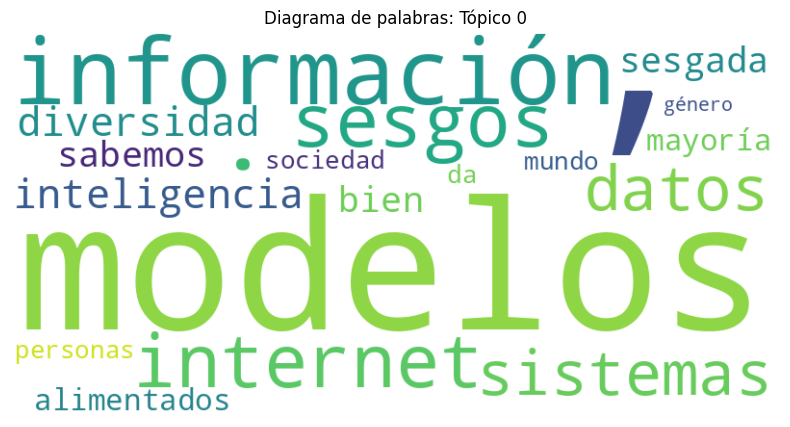

Tópico 1: 0.030*"sesgo" + 0.030*"artificial" + 0.021*"datos" + 0.021*"modelos" + 0.021*"genero"


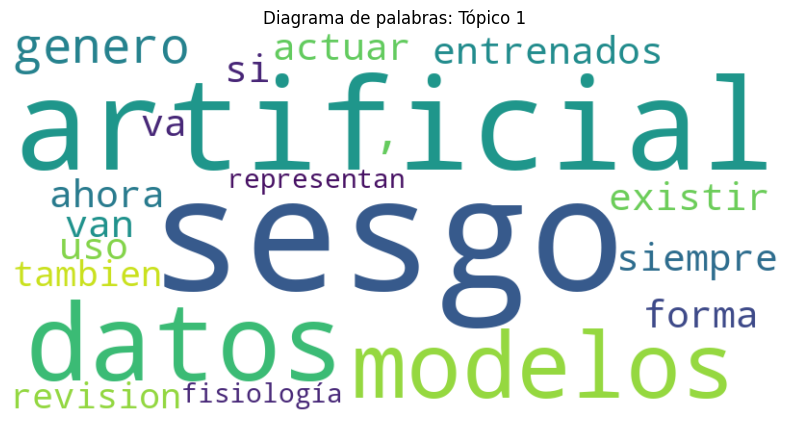

Tópico 2: 0.043*"IA" + 0.043*"." + 0.036*"género" + 0.022*"tener" + 0.015*","


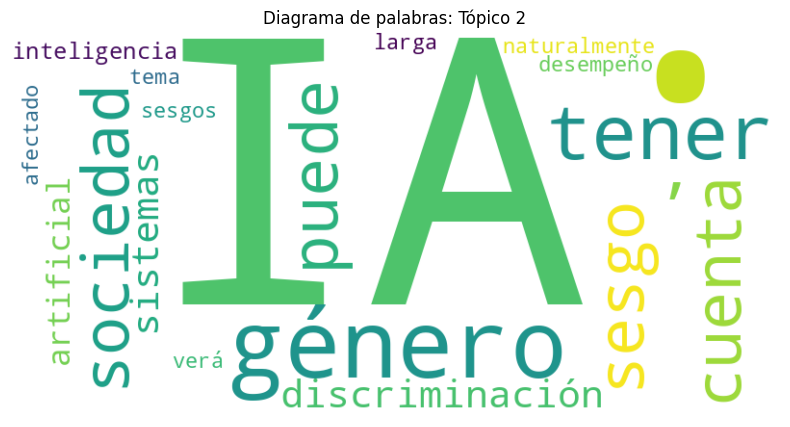

Tópico 3: 0.074*"," + 0.050*"género" + 0.024*"inteligencia" + 0.024*"artificial" + 0.021*"."


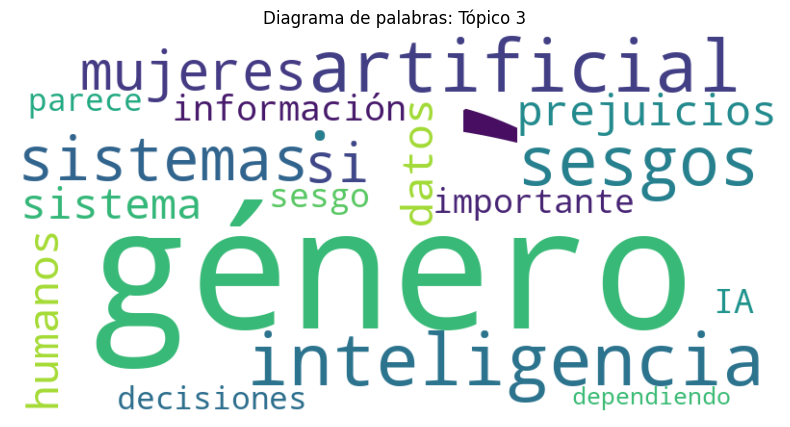

Tópico 4: 0.025*"sesgos" + 0.025*"datos" + 0.025*"," + 0.017*"programación" + 0.017*"género"


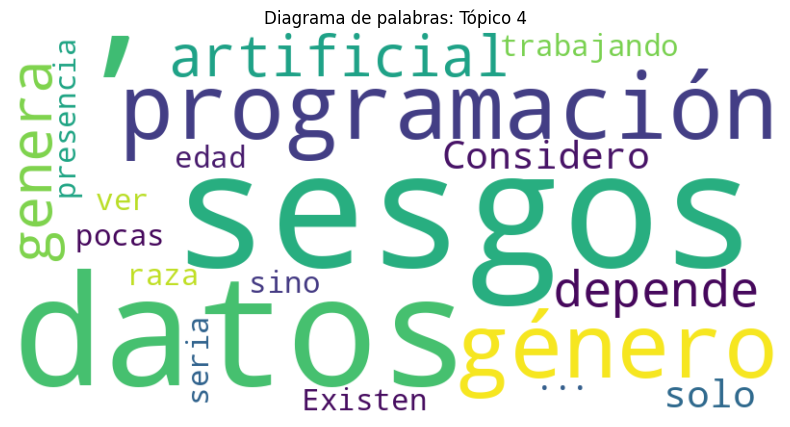

In [14]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for i, topic in topicos:
    print(f"Tópico {i}: {topic}")
    # Crear la nube de palabras para el tópico
    palabras_clave = modelo_lda.show_topic(i, topn=20)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(palabras_clave))
    # Mostrar el diagrama de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Diagrama de palabras: Tópico {i}")
    plt.show()


¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?

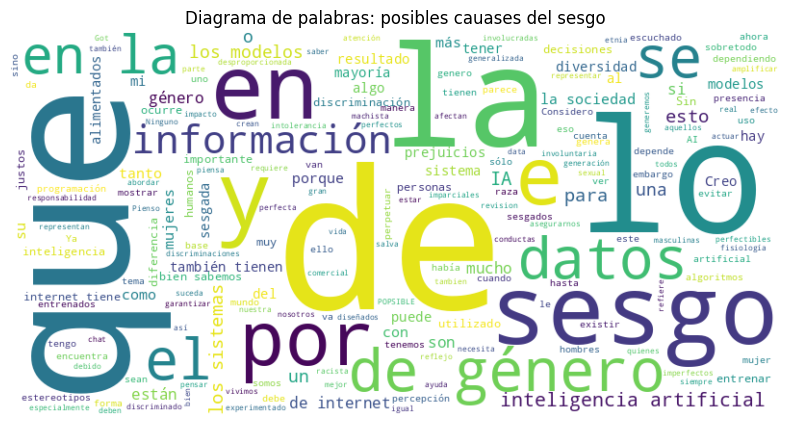

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar las respuestas en un solo texto
df['¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(respuestas)

# Mostrar el diagrama de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Diagrama de palabras: posibles cauases del sesgo')
plt.show()

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for topic in topicos:
    print(topic)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.058*"datos" + 0.031*"Falta" + 0.017*"," + 0.017*"entrenan" + 0.017*"diversidad"')
(1, '0.049*"datos" + 0.037*"sesgos" + 0.026*"información" + 0.026*"género" + 0.014*"sociedad"')
(2, '0.071*"," + 0.036*"." + 0.029*"datos" + 0.015*"misma" + 0.015*"mujeres"')
(3, '0.021*"informacion" + 0.021*"software" + 0.021*"causa" + 0.021*"mayormente" + 0.021*"debido"')
(4, '0.027*"," + 0.021*"datos" + 0.021*"IA" + 0.021*"mujeres" + 0.021*"."')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tópico 0: 0.037*"diversidad" + 0.037*"," + 0.025*"puede" + 0.025*"Falta" + 0.025*"género"


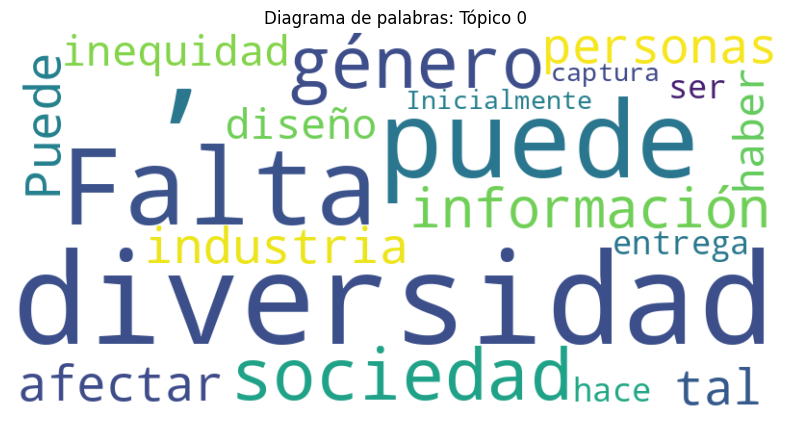

Tópico 1: 0.034*"." + 0.019*"entrenamiento" + 0.019*"informacion" + 0.019*"sesgo" + 0.019*"hombres"


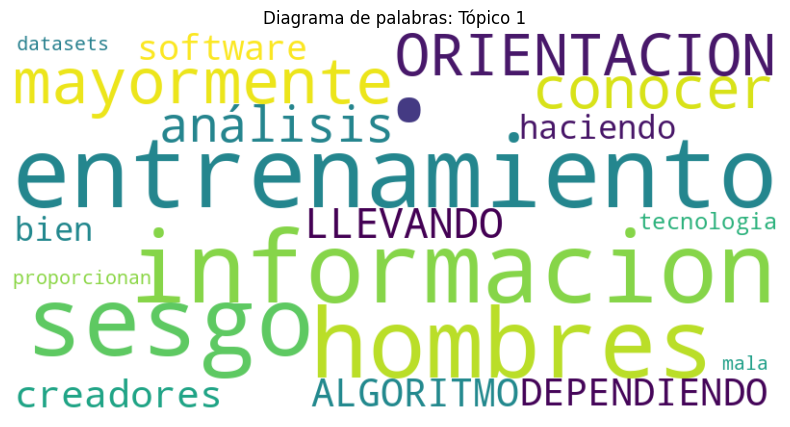

Tópico 2: 0.020*"data" + 0.020*"sistemas" + 0.020*"usa" + 0.020*"usuario" + 0.020*"resultado"


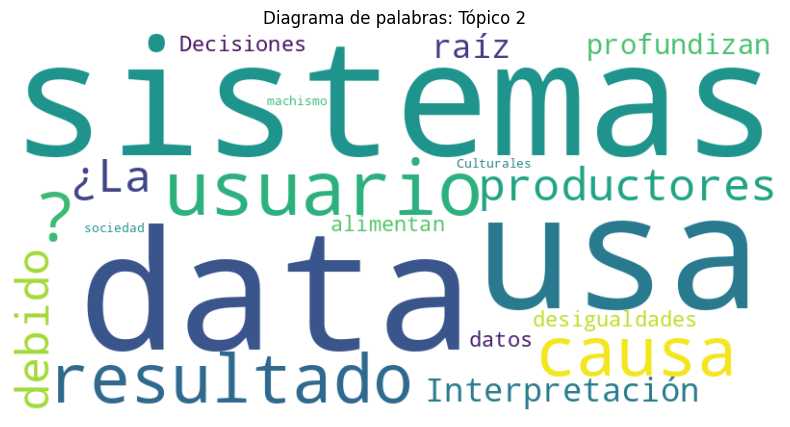

Tópico 3: 0.059*"," + 0.053*"datos" + 0.026*"." + 0.021*"mujeres" + 0.014*"forma"


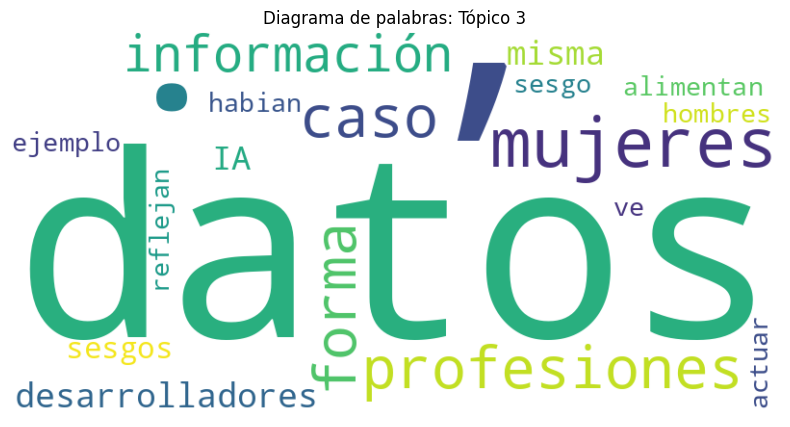

Tópico 4: 0.042*"datos" + 0.032*"sesgos" + 0.029*"," + 0.023*"." + 0.022*"general"


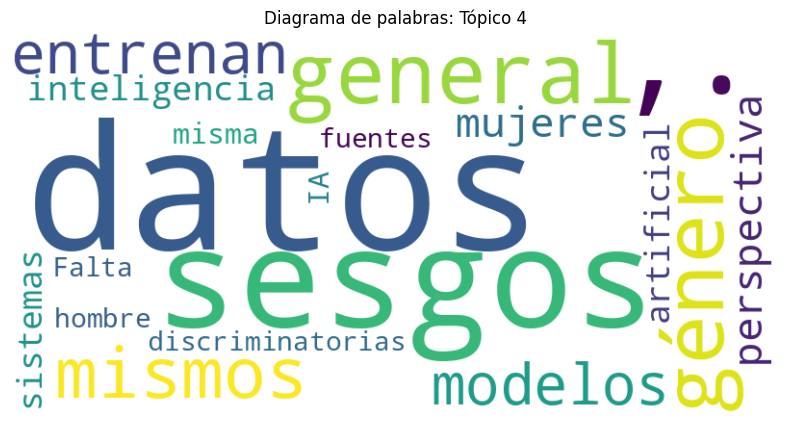

In [18]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for i, topic in topicos:
    print(f"Tópico {i}: {topic}")
    # Crear la nube de palabras para el tópico
    palabras_clave = modelo_lda.show_topic(i, topn=20)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(palabras_clave))
    # Mostrar el diagrama de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Diagrama de palabras: Tópico {i}")
    plt.show()


¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?

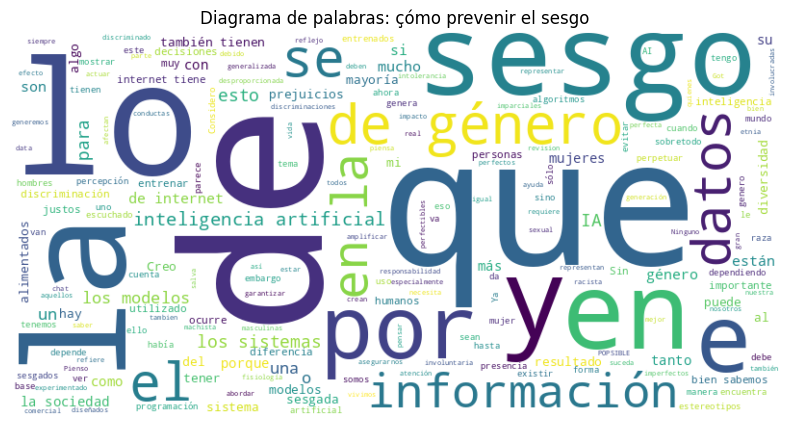

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar las respuestas en un solo texto
df['¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(respuestas)

# Mostrar el diagrama de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Diagrama de palabras: çómo prevenir el sesgo')
plt.show()

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for topic in topicos:
    print(topic)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.040*"datos" + 0.032*"información" + 0.032*"género" + 0.025*"sesgo" + 0.025*","')
(1, '0.029*"datos" + 0.029*"," + 0.016*"nombres" + 0.016*"neutros" + 0.016*"asistentes"')
(2, '0.051*"datos" + 0.045*"," + 0.032*"." + 0.020*"sesgo" + 0.020*"modelos"')
(3, '0.054*"IA" + 0.033*"mas" + 0.033*"mujeres" + 0.023*"Alimentando" + 0.013*"sistema"')
(4, '0.018*"data" + 0.018*"buscar" + 0.018*"toda" + 0.018*"forma" + 0.018*"erróneas"')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tópico 0: 0.030*"datos" + 0.020*"sesgo" + 0.020*"," + 0.020*"equipo" + 0.011*"."


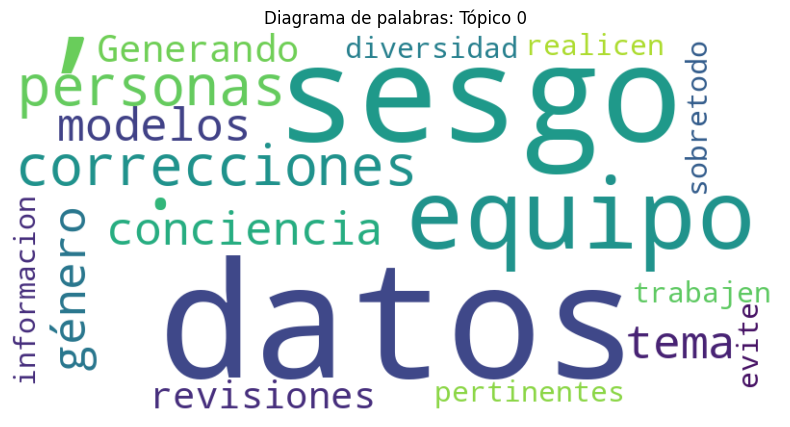

Tópico 1: 0.025*"IA" + 0.025*"mas" + 0.025*"mujeres" + 0.025*"datos" + 0.025*"sesgo"


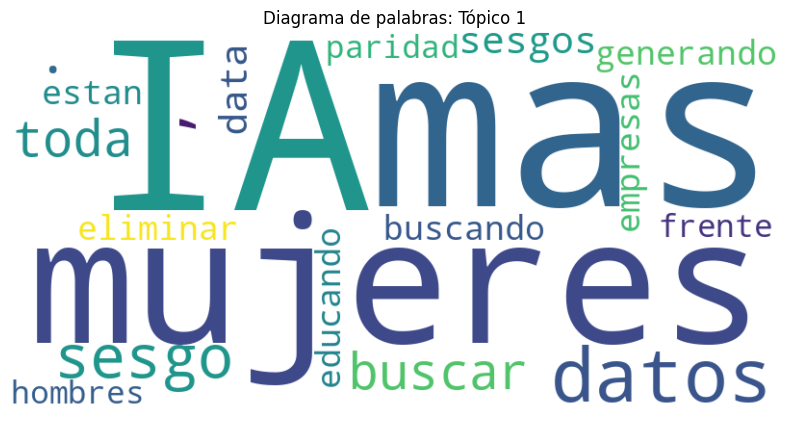

Tópico 2: 0.032*"datos" + 0.032*"." + 0.022*"género" + 0.022*"," + 0.012*"sistema"


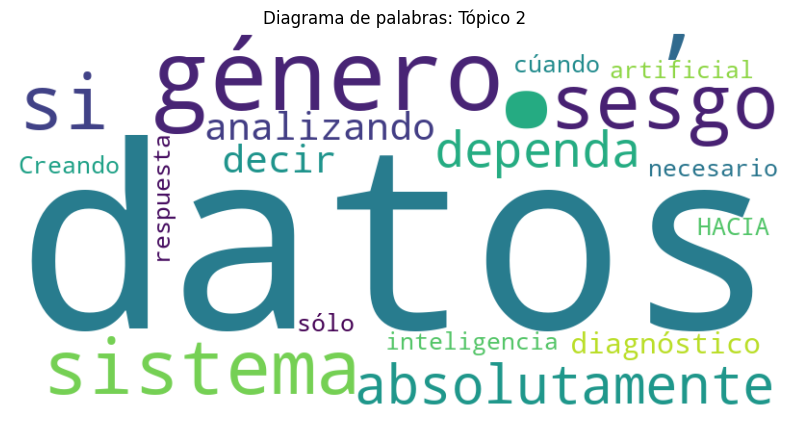

Tópico 3: 0.046*"IA" + 0.024*"información" + 0.024*"datos" + 0.024*"," + 0.024*"podría"


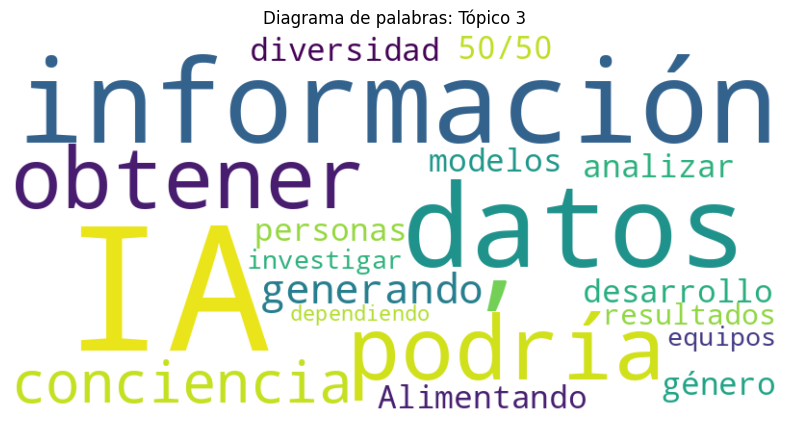

Tópico 4: 0.042*"datos" + 0.032*"," + 0.022*"información" + 0.012*"entender" + 0.012*"sesgo"


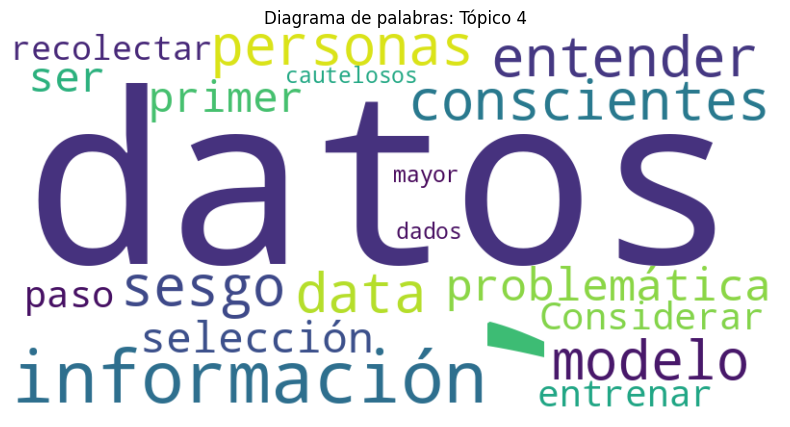

In [23]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for i, topic in topicos:
    print(f"Tópico {i}: {topic}")
    # Crear la nube de palabras para el tópico
    palabras_clave = modelo_lda.show_topic(i, topn=20)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(palabras_clave))
    # Mostrar el diagrama de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Diagrama de palabras: Tópico {i}")
    plt.show()

¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?

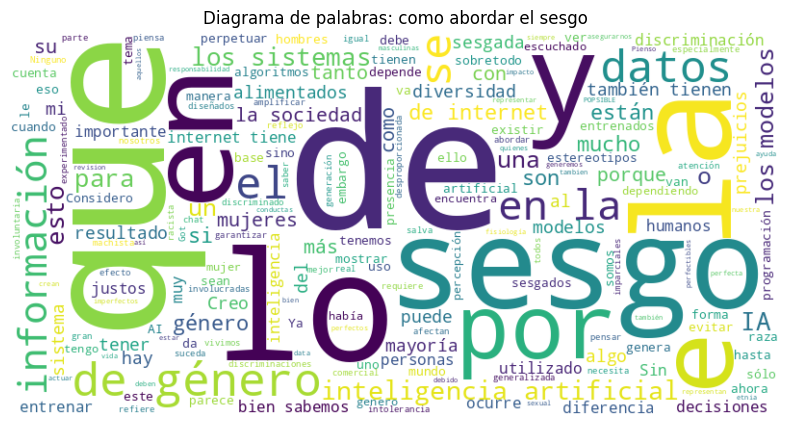

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar las respuestas en un solo texto
df['¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?'].dropna().str.cat(sep=' ')

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(respuestas)

# Mostrar el diagrama de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Diagrama de palabras: como abordar el sesgo')
plt.show()

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for topic in topicos:
    print(topic)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.031*"modelo" + 0.021*"." + 0.021*"Creo" + 0.021*"," + 0.021*"soluciones"')
(1, '0.033*"," + 0.033*"IA" + 0.023*"sesgo" + 0.023*"siga" + 0.023*"existe"')
(2, '0.023*"politicas" + 0.023*"proyectos" + 0.023*"géneros" + 0.023*"participación" + 0.023*"EVITAR"')
(3, '0.072*"," + 0.030*"IA" + 0.023*"." + 0.016*"sesgos" + 0.016*"Tal"')
(4, '0.035*"ser" + 0.019*"transparencia" + 0.019*"igual" + 0.019*"tema" + 0.019*"género"')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tópico 0: 0.026*"," + 0.026*"IA" + 0.026*"Creo" + 0.026*"soluciones" + 0.026*"bien"


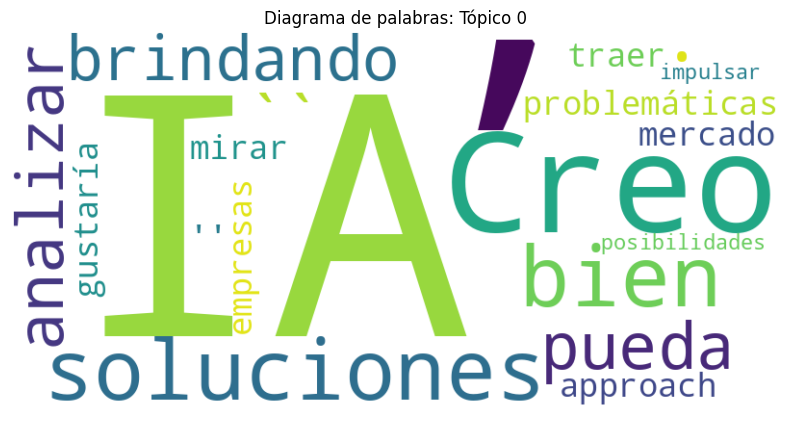

Tópico 1: 0.033*"IA" + 0.018*"." + 0.018*"Tal" + 0.018*"vez" + 0.018*"sistemas"


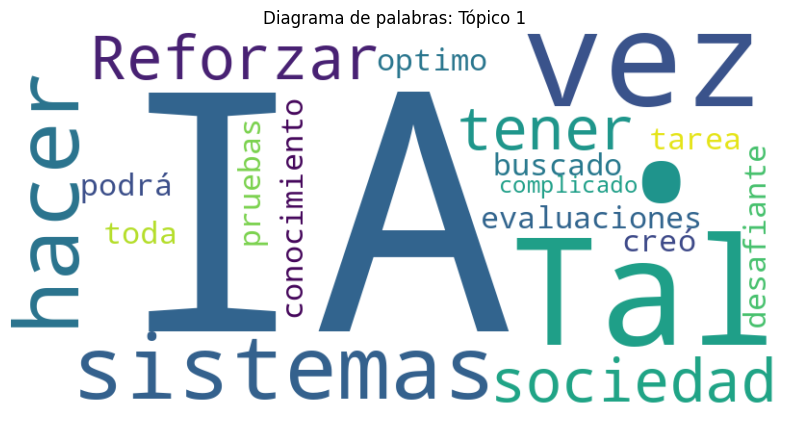

Tópico 2: 0.034*"politicas" + 0.034*"," + 0.019*"regulaciones" + 0.019*"preventivas" + 0.019*"Desrrollando"


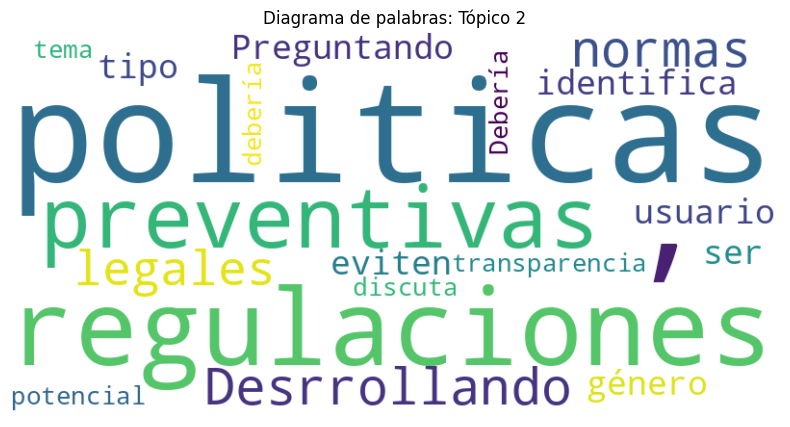

Tópico 3: 0.042*"," + 0.032*"sesgo" + 0.022*"personas" + 0.022*"género" + 0.022*"IA"


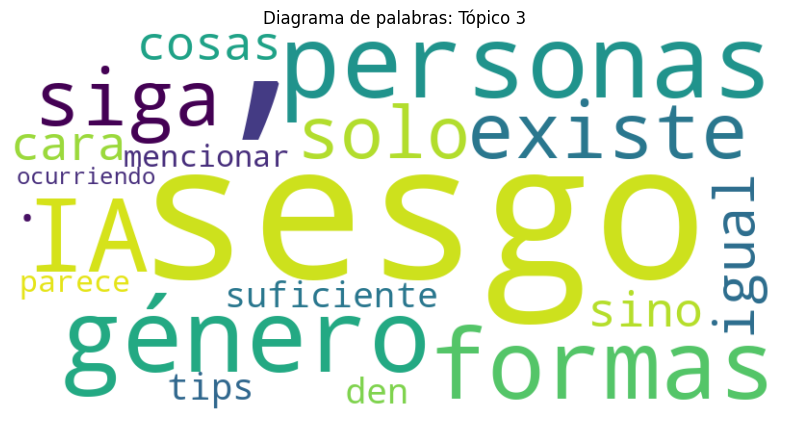

Tópico 4: 0.051*"," + 0.023*"datos" + 0.023*"modelo" + 0.023*"sesgos" + 0.023*"."


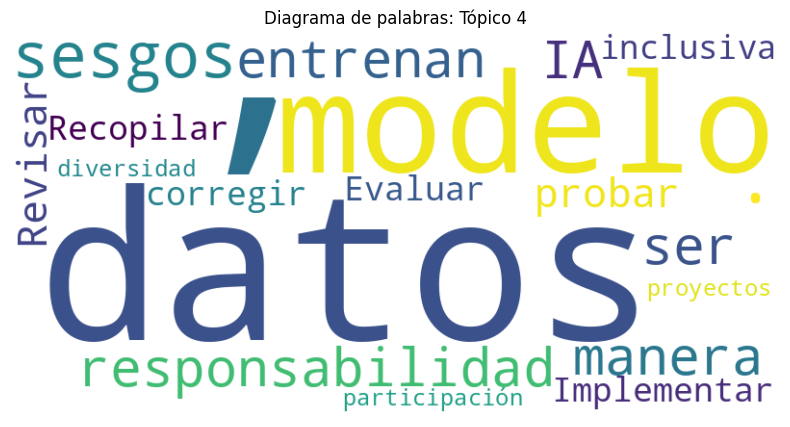

In [26]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')

# Tokenizar las respuestas y filtrar palabras irrelevantes
respuestas_tokenizadas = [nltk.word_tokenize(respuesta) for respuesta in df['¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?'].dropna()]
stopwords = set(stopwords.words('spanish'))  # Personaliza las palabras irrelevantes según tu idioma
respuestas_filtradas = [[palabra for palabra in respuesta if palabra.lower() not in stopwords] for respuesta in respuestas_tokenizadas]

# Crear un diccionario de palabras
diccionario = corpora.Dictionary(respuestas_filtradas)

# Crear una representación vectorial de los documentos
corpus = [diccionario.doc2bow(respuesta) for respuesta in respuestas_filtradas]

# Entrenar un modelo de LDA (Análisis de Asociación Latente)
num_topics = 5  # Personaliza el número de tópicos
modelo_lda = LdaModel(corpus, num_topics=num_topics, id2word=diccionario, passes=10)

# Obtener los tópicos y las palabras clave
topicos = modelo_lda.print_topics(num_topics=num_topics, num_words=5)
for i, topic in topicos:
    print(f"Tópico {i}: {topic}")
    # Crear la nube de palabras para el tópico
    palabras_clave = modelo_lda.show_topic(i, topn=20)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(palabras_clave))
    # Mostrar el diagrama de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Diagrama de palabras: Tópico {i}")
    plt.show()